In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import re; import gsw

In [2]:
import matplotlib as mpl

In [3]:
v = open("bndmbs.txt", "r", encoding="utf-8")
v.read()
v = '  37.00   76.00\n  36.00   75.50\n  35.50   75.00\n  36.00   74.75\n  37.40   74.50\n  39.50   72.00\n  40.50   74.00\n  39.40   74.25\n  37.00   76.00\n'
output1v = v.split('\n')

newv = [] 
for string in output1v:
    output2v = string.split(' ')
    newv.append(output2v)

newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []

for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})

lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']


lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})

In [4]:
polygon_v = Polygon(df_v.values.tolist())
print(polygon_v)

POLYGON ((-76 37, -75.5 36, -75 35.5, -74.75 36, -74.5 37.4, -72 39.5, -74 40.5, -74.25 39.4, -76 37))


In [5]:
x = open("bndmbn.txt", "r", encoding="utf-8")
x.read()
x = '  40.50   74.00\n  39.50   72.00\n  40.00   71.40\n  40.00   69.50\n  41.00   69.50\n  41.10   70.00\n  41.00   72.00\n  40.50   74.00\n'
output1x = x.split('\n')

newx = [] 
for string in output1x:
    output2x = string.split(' ')
    newx.append(output2x)
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []

for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})

lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})

In [6]:
polygon_x = Polygon(df_x.values.tolist())
print(polygon_x)

POLYGON ((-74 40.5, -72 39.5, -71.40000000000001 40, -69.5 40, -69.5 41, -70 41.1, -72 41, -74 40.5))


In [7]:
import re
w = open("bndgb2.txt", "r", encoding="utf-8")
w.read()
w = '  40.00   69.50\n  40.30   68.00\n  40.40   67.50\n  40.60   67.00\n  40.80   66.50\n  41.45   66.00\n  41.80   65.70\n  42.10   66.00\n  42.10   67.00\n  42.10   67.50\n  41.80   68.00\n  41.10   69.00\n  41.00   69.50\n  40.00   69.50\n'
output1w = w.split('\n')

neww = [] 
for string in output1w:
    output2w = string.split(' ')
    neww.append(output2w)

neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []

for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})


lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']

In [8]:
polygon_w = Polygon(df_w.values)
print(polygon_w)

POLYGON ((-69.5 40, -68 40.3, -67.5 40.4, -67 40.6, -66.5 40.8, -66 41.45, -65.7 41.8, -66 42.1, -67 42.1, -67.5 42.1, -68 41.8, -69 41.1, -69.5 41, -69.5 40))


In [9]:
y = open("bndgme.txt", "r", encoding="utf-8")
y.read()
y = '  41.80   68.00\n  42.10   67.50\n  42.10   67.00\n  42.10   66.00\n  43.00   66.00\n  44.20   66.50\n  44.20   67.00\n  44.20   68.00\n  41.80   68.00\n'
output1y = y.split('\n')

newy = [] 
for string in output1y:
    output2y = string.split(' ')
    newy.append(output2y)
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []

for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})

lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})

In [10]:
polygon_y = Polygon(df_y.values)
print(polygon_y)

POLYGON ((-68 41.8, -67.5 42.1, -67 42.1, -66 42.1, -66 43, -66.5 44.2, -67 44.2, -68 44.2, -68 41.8))


In [11]:
t = open("bndgmw.txt", "r", encoding="utf-8")
t.read()
t = '  42.20   70.50\n  42.00   70.00\n  41.10   69.00\n  41.80   68.00\n  44.20   68.00\n  43.90   69.00\n  43.70   70.00\n  43.00   70.50\n  42.20   70.50'
output1t = t.split('\n')
newt = [] 
for string in output1t:
    output2t = string.split(' ')
    newt.append(output2t)
lon_t = []; lat_t = []

for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})

lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

In [12]:
polygon_t = Polygon(df_t.values)
print(polygon_t)

POLYGON ((-70.5 42.2, -70 42, -69 41.1, -68 41.8, -68 44.2, -69 43.9, -70 43.7, -70.5 43, -70.5 42.2))


In [13]:
fname ='wind-adaptor.mars.internal-1598399500.1663413-7474-3-df035ece-01a4-4e80-a685-554ea53e9d02.nc'

In [14]:
newname = 'adaptor.mars.internal-1599239252.6533058-24454-11-42592aea-b286-4abb-ac52-9b707b15bacc.nc'

In [15]:
DS=xr.open_dataset(fname)
DN = xr.open_dataset(newname)

In [ ]:
print(DS)

In [202]:
print(DN)

<xarray.Dataset>
Dimensions:    (latitude: 45, longitude: 61, time: 312)
Coordinates:
  * longitude  (longitude) float32 -78.0 -77.75 -77.5 ... -63.5 -63.25 -63.0
  * latitude   (latitude) float32 46.0 45.75 45.5 45.25 ... 35.5 35.25 35.0
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2018-12-01
Data variables:
    si10       (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-04 17:11:25 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [16]:
print(DS)

<xarray.Dataset>
Dimensions:    (latitude: 45, longitude: 61, time: 312)
Coordinates:
  * longitude  (longitude) float32 -78.0 -77.75 -77.5 ... -63.5 -63.25 -63.0
  * latitude   (latitude) float32 46.0 45.75 45.5 45.25 ... 35.5 35.25 35.0
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2018-12-01
Data variables:
    si10       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-08-25 23:53:31 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [17]:
data_1993_2018=DS.sel(time=slice('1993-01-01','2018-12-25')) # entire time frame
data_1993_2018_windsp=data_1993_2018.si10.mean(dim='time')

In [18]:
dat_1993_2018=DN.sel(time=slice('1993-01-01','2018-12-25')) # entire time frame
dat_1993_2018_t2m=dat_1993_2018.si10.mean(dim='time')

In [19]:
lat = dat_1993_2018.latitude # latitude
lon = dat_1993_2018.longitude # longitude
temp2m = dat_1993_2018.t2m # near-surface air temperature

In [20]:
lat = data_1993_2018.latitude # latitude
lon = data_1993_2018.longitude # longitude
windsp = data_1993_2018.si10 # near-surface air temperature

In [21]:
print(temp2m.shape)

(312, 45, 61)


In [22]:
print(windsp.shape)

(312, 45, 61)


In [23]:
def weighted_mean(data_da, dim, weights):
    r"""Computes the weighted mean.
    We can only do the actual weighted mean over the dimensions that
    ``data_da`` and ``weights`` share, so for dimensions in ``dim`` that aren't
    included in ``weights`` we must take the unweighted mean.

    This functions skips NaNs, i.e. Data points that are NaN have corresponding
    NaN weights.

    Args:
        data_da (xarray.DataArray):
            Data to compute a weighted mean for.
        dim (str | list[str]):
            dimension(s) of the dataarray to reduce over
        weights (xarray.DataArray):
            a 1-D dataarray the same length as the weighted dim, with dimension
            name equal to that of the weighted dim. Must be nonnegative.
    Returns:
        (xarray.DataArray):
            The mean over the given dimension. So it will contain all
            dimensions of the input that are not in ``dim``.
    Raises:
        (IndexError):
            If ``weights.dims`` is not a subset of ``dim``.
        (ValueError):
            If ``weights`` has values that are negative or infinite.
    """
    if isinstance(dim, str):
        dim = [dim]
    else:
        dim = list(dim)

    if not set(weights.dims) <= set(dim):
        dim_err_msg = (
            "`weights.dims` must be a subset of `dim`. {} are dimensions in "
            "`weights`, but not in `dim`."
        ).format(set(weights.dims) - set(dim))
        raise IndexError(dim_err_msg)
    else:
        pass  # `weights.dims` is a subset of `dim`

    if (weights < 0).any() or xr.ufuncs.isinf(weights).any():
        negative_weight_err_msg = "Weight must be nonnegative and finite"
        raise ValueError(negative_weight_err_msg)
    else:
        pass  # `weights` are nonnegative

    weight_dims = [
        weight_dim for weight_dim in dim if weight_dim in weights.dims
    ]

    if np.isnan(data_da).any():
        expanded_weights, _ = xr.broadcast(weights, data_da)
        weights_with_nans = expanded_weights.where(~np.isnan(data_da))
    else:
        weights_with_nans = weights

    mean_da = ((data_da * weights_with_nans).sum(weight_dims, skipna=True)
               / weights_with_nans.sum(weight_dims))
    other_dims = list(set(dim) - set(weight_dims))
    return mean_da.mean(other_dims, skipna=True)

In [24]:
rad  = 4.*math.atan(1.)/180.
weights_lat   = np.cos(lat*rad)

In [25]:
wmean_lat = weighted_mean(data_1993_2018.si10, dim='latitude', weights=weights_lat)
wmean =  wmean_lat.mean(dim='longitude')
annual_wmean = wmean.groupby('time.year').mean(dim='time')

In [27]:
# print(weighted_mean.shape)

In [29]:
# month_wmean = wmean.groupby('time.year.month').mean(dim='time')

In [30]:
print(data_1993_2018.si10.shape)

(312, 45, 61)


In [31]:
print(wmean_lat.shape)
print(wmean.shape)
print(annual_wmean.shape)

(312, 61)
(312,)
(26,)


In [32]:
monthly_wmean = wmean.groupby('time.month').mean(dim='time')
print(monthly_wmean.shape)

(12,)


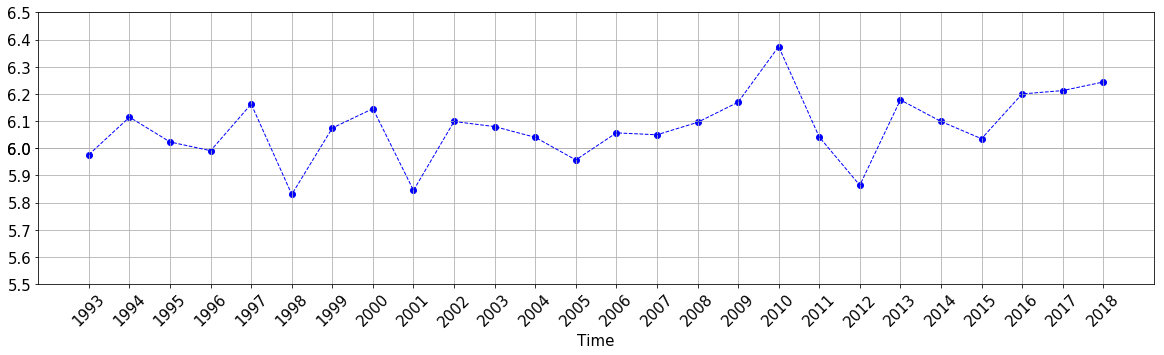

In [33]:
plt.figure(figsize=(20,5))
plt.ylim(5.5,6.5)
plt.scatter(annual_wmean.year, annual_wmean.data, marker='o', c='blue')
plt.plot(annual_wmean.year, annual_wmean.data, linestyle='--', color='blue', linewidth=1)
plt.xlabel('Time', fontsize = 15)
plt.xticks([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
           2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], fontsize = 15, rotation = 45) 
# plt.yticks([26, 28, 30, 32, 34, 36], fontsize = 15) 
plt.yticks([5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6,6.5], fontsize = 15) 
plt.grid(True)
plt.show()

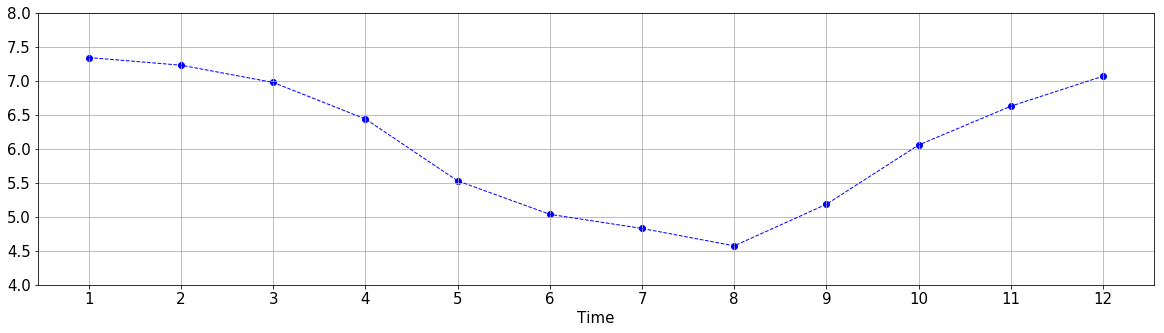

In [34]:
plt.figure(figsize=(20,5))
plt.ylim(4,8)
plt.scatter(monthly_wmean.month, monthly_wmean.data, marker='o', c='blue')
plt.plot(monthly_wmean.month, monthly_wmean.data, linestyle='--', color='blue', linewidth=1)
plt.xlabel('Time', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0], fontsize = 15) 
plt.grid(True)
plt.show()

In [35]:
wmean_seasonal = data_1993_2018.resample(time='Q-FEB').mean()

In [36]:
wmean_DJF = wmean_seasonal.sel(time=wmean_seasonal.time.dt.month==2) # 2 for FEB
wmean_MAM = wmean_seasonal.sel(time=wmean_seasonal.time.dt.month==5) # 5 for MAY
wmean_JJA = wmean_seasonal.sel(time=wmean_seasonal.time.dt.month==8) # 8 for AUG
wmean_SON = wmean_seasonal.sel(time=wmean_seasonal.time.dt.month==11) # 11 for SEP

In [37]:
print(wmean_DJF['si10'].shape)
wmean_DJF_si10_mean=wmean_DJF.si10.mean(dim='time')
print(wmean_DJF_si10_mean.shape)

(27, 45, 61)
(45, 61)


In [38]:
print(wmean_MAM['si10'].shape)
wmean_MAM_si10_mean=wmean_MAM.si10.mean(dim='time')
print(wmean_MAM_si10_mean.shape)

(26, 45, 61)
(45, 61)


In [39]:
print(wmean_JJA['si10'].shape)
wmean_JJA_si10_mean=wmean_JJA.si10.mean(dim='time')
print(wmean_JJA_si10_mean.shape)

(26, 45, 61)
(45, 61)


In [40]:
print(wmean_SON['si10'].shape)
wmean_SON_si10_mean=wmean_SON.si10.mean(dim='time')
print(wmean_SON_si10_mean.shape)

(26, 45, 61)
(45, 61)


In [43]:
print(DS['si10'].shape)
DS_lat = DS['latitude']; DS_lon = DS['longitude']
print(len(DS_lat));print(len(DS_lon))

(312, 45, 61)
45
61


In [42]:
latcheck = []; loncheck = []
for ii in range(len(DS_lon)):
    for i in range(len(DS_lat)):
#         print(ii, i, 'point', DS_lon[ii].data, DS_lat[i].data)
        latcheck.append(DS_lat[i].data)
        loncheck.append(DS_lon[ii].data)

NameError: name 'DS_lon' is not defined

In [44]:
mean = []
std = []
for i in range(25):
    wmean = wmean_SON['si10']
    useable = wmean[i]
    useabletransp = useable.transpose()
    
    newlon = lonlist_x #newlon 
    newlat = latlist_x #newlat 
    newpath = list(zip(newlon,newlat))
    newpd = pd.DataFrame(newpath, columns=['lon','lat'])
    path_new = Path(newpath)
    points = np.vstack((loncheck,latcheck)).T
    path_new = Path(newpath)
        
    grid = path_new.contains_points(points)
    grid = grid.reshape((22,22))
    
    newgridded = np.where(grid == False, np.nan, useabletransp)
    
    mean.append(np.nanmean(newgridded))
    std.append(np.nanstd(newgridded))

ValueError: cannot reshape array of size 0 into shape (22,22)

In [103]:
print(mean)

[7.275484, 7.2349353, 7.281698, 6.8288727, 7.022868, 6.781388, 7.09987, 6.972638, 6.9852595, 7.4597735, 7.117436, 6.910727, 7.333403, 7.0595756, 6.8180046, 7.0827317, 7.4956923, 7.848545, 6.8434563, 7.1876507, 7.1686225, 7.3914595, 7.0862503, 7.285578, 7.366929, 7.5316515]


In [104]:
print(std)

[0.558829, 0.59986746, 0.5620563, 0.48096558, 0.5125761, 0.5340866, 0.55120414, 0.5873818, 0.5515214, 0.57593155, 0.54780895, 0.5756897, 0.55878764, 0.5464442, 0.51598376, 0.6316202, 0.66073936, 0.682038, 0.5937556, 0.6388333, 0.60586536, 0.67183393, 0.60904086, 0.6647469, 0.6601745, 0.61128265]


## Southern MAB

In [49]:
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [50]:
spring_mean_smab = [6.703816, 7.0362024, 6.147339, 7.2632613, 7.375919, 6.642251, 7.2080975, 7.1684313, 6.5069137, 6.8911543, 6.525936, 6.8780026, 6.813952, 6.659931, 6.878999, 7.294866, 6.8335724, 6.4794383, 7.0108423, 6.344038, 7.3599463, 7.1334896, 6.553607, 6.757135, 7.3809795, 7.3270545]
spring_std_smab = [0.5483645, 0.5559127, 0.49900725, 0.57625526, 0.61417204, 0.5028813, 0.5928985, 0.5795495, 0.5839157, 0.52020264, 0.4783902, 0.5828997, 0.5868284, 0.5963786, 0.5712531, 0.64855456, 0.6072033, 0.49841633, 0.58303684, 0.5199881, 0.6849739, 0.6207662, 0.56489956, 0.581275, 0.630662, 0.6566002]

summer_mean_smab = [4.976861, 5.6386685, 5.519126, 5.010835, 5.225759, 5.406206, 5.9869666, 5.4703975, 5.4582415, 5.4415646, 5.453002, 5.3241043, 4.974813, 5.7096553, 5.5032883, 5.164916, 4.955413, 5.4384913, 5.3299522, 5.3253264, 5.883666, 5.209009, 5.291596, 5.187407, 5.5831065, 5.4179893]
summer_std_smab = [0.3615641, 0.44067365, 0.39009446, 0.33848315, 0.371104, 0.40329254, 0.47688097, 0.43233275, 0.45806077, 0.37337694, 0.50217956, 0.39857608, 0.3984568, 0.49920622, 0.46718267, 0.43706277, 0.3624018, 0.42262042, 0.45667374, 0.46893886, 0.53457314, 0.37560037, 0.40327212, 0.379051, 0.4659723, 0.41804057]

fall_mean_smab = [6.589707, 6.858508, 6.9003334, 6.6189437, 6.59399, 6.2390327, 6.935159, 6.746244, 6.3538055, 6.988195, 6.7619348, 6.502483, 7.0086083, 6.6639943, 6.2900314, 7.0812616, 7.3043246, 7.1978474, 6.557177, 6.9812493, 6.7969255, 7.180836, 6.85726, 7.008825, 6.721509, 6.959264]
fall_std_smab = [0.52523345, 0.5820275, 0.55021596, 0.5056989, 0.591445, 0.58796, 0.54441845, 0.59881926, 0.55340844, 0.5969166, 0.53738993, 0.5252813, 0.5337876, 0.5251059, 0.48929954, 0.61280155, 0.63691276, 0.62374043, 0.53608924, 0.6067849, 0.6110116, 0.6630506, 0.56132513, 0.63116103, 0.6269721, 0.64209104]

winter_mean_smab = [8.179051, 7.754885, 7.9331293, 8.172844, 7.8552623, 7.690392, 7.468666, 7.9594884, 7.516309, 7.6647367, 8.419504, 8.534845, 7.914146, 8.064349, 8.125017, 7.7257495, 8.132624, 8.88764, 8.188858, 7.663381, 7.6586533, 7.6567564, 8.208952, 8.035612, 7.71563, 7.85068] 
winter_std_smab = [0.8002467, 0.7819211, 0.78246367, 0.8193495, 0.79405934, 0.7316937, 0.70458347, 0.823767, 0.80050594, 0.8343699, 0.93270427, 0.9074953, 0.7744224, 0.8631877, 0.9324549, 0.7380718, 0.8550929, 0.9989625, 0.87922114, 0.7766577, 0.89211816, 0.8285669, 0.8859019, 0.80050594, 0.8961393, 0.84066004]

## Northern MAB

In [51]:
spring_mean_nmab = [7.1210737, 7.19806, 6.3826766, 7.396808, 7.6792336, 6.9890494, 7.1507688, 7.347149, 6.897619, 7.185831, 6.788275, 7.0229173, 7.008355, 6.975228, 7.231594, 7.248543, 6.996224, 6.870243, 7.224352, 6.386273, 7.4208574, 7.211266, 6.8436713, 7.0255027, 7.6368375, 7.7327304]
spring_std_nmab = [0.5933672, 0.6218227, 0.52993244, 0.59119976, 0.6077275, 0.576661, 0.5668337, 0.6138173, 0.6483702, 0.5476443, 0.55240524, 0.6684637, 0.6420868, 0.615327, 0.6390173, 0.628215, 0.6525256, 0.57004154, 0.6541995, 0.49584973, 0.6996964, 0.63463247, 0.58147633, 0.6545347, 0.6868696, 0.73116493]

summer_mean_nmab = [5.358516, 5.757827, 5.754369, 5.1696763, 5.533973, 5.312524, 5.9150133, 5.5611753, 5.526255, 5.749743, 5.554248, 5.4768376, 5.3620667, 5.9435434, 5.7577105, 5.0304923, 5.255664, 5.5696416, 5.236903, 5.2148113, 5.986355, 5.315807, 5.378638, 5.4480696, 5.6191144, 5.4780993]
summer_std_nmab = [0.34367606, 0.41558367, 0.40335912, 0.35457852, 0.41906333, 0.34500444, 0.43093932, 0.385048, 0.4448197, 0.42447874, 0.48173058, 0.4010532, 0.39026946, 0.44596627, 0.4807924, 0.3935718, 0.4253457, 0.40832725, 0.38881275, 0.40757987, 0.4904463, 0.41753653, 0.4021378, 0.4163606, 0.47530752, 0.4138786]

fall_mean_nmab = [7.275484, 7.2349353, 7.281698, 6.8288727, 7.022868, 6.781388, 7.09987, 6.972638, 6.9852595, 7.4597735, 7.117436, 6.910727, 7.333403, 7.0595756, 6.8180046, 7.0827317, 7.4956923, 7.848545, 6.8434563, 7.1876507, 7.1686225, 7.3914595, 7.0862503, 7.285578, 7.366929, 7.5316515]
fall_std_nmab = [0.558829, 0.59986746, 0.5620563, 0.48096558, 0.5125761, 0.5340866, 0.55120414, 0.5873818, 0.5515214, 0.57593155, 0.54780895, 0.5756897, 0.55878764, 0.5464442, 0.51598376, 0.6316202, 0.66073936, 0.682038, 0.5937556, 0.6388333, 0.60586536, 0.67183393, 0.60904086, 0.6647469, 0.6601745, 0.61128265]

winter_mean_nmab = [8.663792, 8.632232, 8.568392, 8.692354, 8.619721, 8.113838, 8.140947, 8.616371, 8.024926, 8.173375, 9.126378, 9.097854, 8.372607, 8.626158, 8.921269, 8.224502, 8.803112, 9.239378, 8.620103, 7.974594, 8.53971, 8.389969, 8.80876, 8.419779, 8.54032, 8.498353]
winter_std_nmab = [0.77121514, 0.7606531, 0.7925615, 0.7292763, 0.7185216, 0.7023725, 0.7669521, 0.7621255, 0.7981423, 0.82283866, 0.9375261, 0.8789749, 0.8123733, 0.7879974, 0.8617838, 0.78636867, 0.8162244, 0.9206087, 0.7935118, 0.76972944, 0.87014866, 0.85713196, 0.86248356, 0.7811223, 0.8668219, 0.8658181]

## Georges Bank

In [52]:
spring_mean_gb = [7.6003942, 7.568748, 7.021229, 7.8435206, 8.033285, 7.474203, 7.417451, 7.971221, 7.332926, 7.4463634, 7.2457933, 7.3004723, 7.5634103, 7.736435, 7.7526608, 7.9796166, 7.495868, 7.4408584, 8.009202, 6.7323112, 8.050604, 7.808233, 7.6595483, 7.873764, 8.468828, 8.639511]
spring_std_gb = [0.17116663, 0.08038226, 0.16653746, 0.091852695, 0.07501944, 0.07552552, 0.1067557, 0.1531203, 0.163483, 0.1267596, 0.1385227, 0.096564926, 0.15177172, 0.22521098, 0.11906277, 0.17426795, 0.13170463, 0.112421684, 0.1653518, 0.07849203, 0.1962612, 0.14609982, 0.24743478, 0.22212492, 0.14996785, 0.21210784]

summer_mean_gb = [5.2767453, 5.628622, 5.750986, 5.145342, 5.6477637, 5.215864, 5.7106643, 5.501533, 5.4626627, 5.520185, 5.6381373, 5.3591843, 5.2362976, 5.912763, 5.688363, 5.190049, 5.2915373, 5.6507044, 5.400713, 5.1953588, 6.086216, 5.6082172, 5.1467423, 5.503639, 5.772985, 5.6386523] 
summer_std_gb = [0.12036063, 0.15156488, 0.11948987, 0.15759145, 0.0982461, 0.09325504, 0.145412, 0.086341426, 0.1050512, 0.13856713, 0.09916818, 0.11220594, 0.103634916, 0.07885475, 0.056860745, 0.10364663, 0.092067726, 0.16832957, 0.19267315, 0.109076366, 0.08365762, 0.21102886, 0.13097142, 0.14391777, 0.12909476, 0.10297945]

fall_mean_gb = [7.40123, 7.645211, 7.4306817, 7.3742914, 7.1611624, 7.0006075, 7.140325, 7.3789625, 7.0428843, 7.8747187, 6.858822, 7.495488, 7.35539, 7.071929, 7.256655, 7.3142076, 7.740456, 8.502957, 7.295369, 7.47565, 7.4989896, 7.4306955, 7.3845987, 7.643703, 7.64376, 7.9638085]
fall_std_gb = [0.1929051, 0.14307363, 0.11063007, 0.18913887, 0.20643061, 0.16915199, 0.11607999, 0.11339049, 0.11117427, 0.19940089, 0.100973316, 0.14381076, 0.12260526, 0.08456709, 0.21130961, 0.13636893, 0.15636294, 0.22467847, 0.1394867, 0.13565788, 0.16083516, 0.14024115, 0.15566236, 0.19706424, 0.097050674, 0.156507]

winter_mean_gb = [9.170182, 9.260713, 9.117603, 9.246058, 9.21258, 8.746535, 8.871081, 9.4298315, 9.059621, 8.972123, 10.039969, 10.184718, 9.094172, 9.156029, 9.731096, 8.985767, 9.400527, 9.960981, 9.522852, 8.474631, 9.407602, 9.200588, 9.6340275, 9.146934, 9.442002, 9.552221]
winter_std_gb = [0.107380524, 0.14093907, 0.104502186, 0.14751874, 0.23228993, 0.18318109, 0.10590218, 0.185683, 0.2735261, 0.14997089, 0.15478371, 0.22902249, 0.10057001, 0.109524496, 0.12756917, 0.1373794, 0.18447424, 0.20896953, 0.18609819, 0.10013188, 0.15339863, 0.16173865, 0.20597991, 0.1649552, 0.16441664, 0.31141958]

## Eastern Gulf of Maine

In [53]:
spring_mean_egom = [7.6307354, 7.7970843, 6.886993, 7.793651, 8.26557, 7.258941, 7.396073, 7.9238505, 7.1589537, 7.802248, 6.981419, 7.354256, 7.5206637, 7.9139833, 8.050702, 7.855492, 7.4192634, 7.2494607, 8.116279, 6.854461, 7.5492606, 7.638171, 7.938604, 7.800451, 8.235858, 8.232248]
spring_std_egom  = [0.16924435, 0.08086929, 0.16917984, 0.13499802, 0.10509797, 0.16600014, 0.08803491, 0.1810855, 0.10521351, 0.09301815, 0.1712117, 0.13591191, 0.10870148, 0.18683732, 0.13443886, 0.19063395, 0.09399563, 0.12746847, 0.103871845, 0.092892736, 0.16095687, 0.12766425, 0.102813974, 0.133601, 0.2080654, 0.22565123]

summer_mean_egom  = [5.562569, 6.3283825, 5.8249164, 5.6474824, 5.8355174, 5.685093, 5.8490033, 5.7145634, 5.7630386, 5.911514, 5.8089466, 5.672658, 5.517405, 6.0846815, 5.6047916, 5.323164, 5.610845, 5.718889, 5.7793164, 5.4301414, 5.924472, 5.8313203, 5.436086, 5.8730774, 5.8617873, 5.9641623]
summer_std_egom  = [0.08257357, 0.17690173, 0.09340432, 0.09919729, 0.08782416, 0.11739414, 0.10489488, 0.07645909, 0.09402715, 0.1428336, 0.1251925, 0.08363127, 0.09644068, 0.13511404, 0.15852356, 0.09089575, 0.0916164, 0.13437738, 0.099357665, 0.081685565, 0.14973171, 0.087994576, 0.067847155, 0.07679891, 0.07173727, 0.07916908]

fall_mean_egom  = [7.9633007, 7.861857, 7.447263, 7.537016, 7.411359, 7.5941935, 7.611486, 7.413688, 7.2905517, 8.263543, 6.7897034, 7.642858, 7.5895233, 7.120693, 7.258164, 7.352061, 7.480826, 8.45417, 7.3872247, 7.3858166, 7.396061, 7.626788, 7.6730003, 7.528113, 7.6487813, 8.231745]
fall_std_egom  = [0.10283307, 0.13732372, 0.100301675, 0.09784407, 0.12186473, 0.17030191, 0.23191524, 0.107816935, 0.10709876, 0.155221, 0.11820185, 0.11075741, 0.098151624, 0.13963221, 0.1302197, 0.094700396, 0.13365401, 0.21419351, 0.10667624, 0.1171586, 0.114553414, 0.12594384, 0.091212794, 0.12354835, 0.08274089, 0.107529]

winter_mean_egom  = [9.207216, 9.5577135, 9.338539, 9.323356, 9.459232, 8.858882, 9.151707, 9.714353, 9.21316, 8.979912, 9.960368, 10.116384, 8.945595, 9.23463, 9.657691, 9.048863, 9.756252, 9.7399025, 9.284705, 8.744629, 9.678738, 9.160863, 9.869342, 9.091523, 9.66163, 9.859899]
winter_std_egom  = [0.1289419, 0.11897515, 0.13362634, 0.13882604, 0.1543266, 0.16936828, 0.11037939, 0.11591503, 0.21885575, 0.12264832, 0.18931754, 0.13597186, 0.19456805, 0.124067545, 0.15403277, 0.13133833, 0.12736695, 0.1329641, 0.14253248, 0.108952, 0.1326558, 0.14374478, 0.12746377, 0.14238112, 0.13322215, 0.19290179]

## Western Gulf of Maine

In [54]:
spring_mean_wgom = [7.2353606, 7.506419, 6.365728, 7.3531384, 7.816981, 6.9774904, 7.0322967, 7.5223193, 6.922446, 7.415285, 6.69053, 7.116893, 7.1155777, 7.365737, 7.668666, 7.3203306, 7.1222463, 6.9962215, 7.5780964, 6.480512, 7.221281, 7.3398957, 7.4815316, 7.186586, 7.708633, 7.8262973]
spring_std_wgom = [0.40671885, 0.41613615, 0.36879095, 0.4455838, 0.42952758, 0.38787282, 0.38643417, 0.47472215, 0.4199659, 0.40806884, 0.38174856, 0.4124681, 0.38727403, 0.5217884, 0.4320636, 0.53623873, 0.38338786, 0.38490844, 0.47415763, 0.34029633, 0.4174032, 0.45743495, 0.47101146, 0.48412922, 0.5613646, 0.52073187]

summer_mean_wgom = [5.484117, 6.3430734, 5.782878, 5.4747133, 5.7294865, 5.494259, 5.8171983, 5.6707597, 5.617972, 5.8549376, 5.598743, 5.5941606, 5.4918838, 5.9426866, 5.5892563, 5.2672606, 5.4641705, 5.634958, 5.5815525, 5.3010726, 5.692047, 5.708171, 5.2903786, 5.764957, 5.799401, 5.821967]
summer_std_wgom = [0.1924315, 0.29427162, 0.25826976, 0.19772837, 0.3037512, 0.24143067, 0.2564832, 0.23515044, 0.25785357, 0.32468313, 0.31178418, 0.26545274, 0.2531051, 0.3515724, 0.34426776, 0.2797613, 0.24770461, 0.27777424, 0.26010287, 0.24973999, 0.38478386, 0.27367923, 0.21990621, 0.24426048, 0.2516805, 0.26723865]

fall_mean_wgom = [7.6518393, 7.439746, 7.2688174, 7.255583, 7.065282, 7.3193197, 7.4699745, 7.0949917, 7.08194, 7.763503, 6.696739, 7.2696013, 7.3630457, 6.911875, 6.9673877, 7.0114536, 7.082755, 8.094075, 6.9885983, 7.071165, 7.0509567, 7.329148, 7.265823, 7.147867, 7.416394, 7.7595973]
fall_std_wgom = [0.41481665, 0.44967198, 0.3419077, 0.33110553, 0.35346153, 0.3736807, 0.3363887, 0.36320925, 0.3754341, 0.48094523, 0.3080892, 0.45247468, 0.33315456, 0.39425972, 0.39257103, 0.4125861, 0.44824764, 0.5291898, 0.40990967, 0.38472092, 0.42081967, 0.35787207, 0.42814383, 0.42800525, 0.3968122, 0.48337436]

winter_mean_wgom = [8.727708, 9.053376, 8.849838, 9.003202, 8.946848, 8.309922, 8.633948, 9.150813, 8.541116, 8.426204, 9.436811, 9.569627, 8.451869, 8.776338, 9.156182, 8.467677, 9.174886, 9.308089, 8.848838, 8.215452, 9.087346, 8.652677, 9.306737, 8.634165, 9.206611, 9.014142]
winter_std_wgom = [0.5078101, 0.4773805, 0.547796, 0.4603952, 0.54532635, 0.48820662, 0.53158164, 0.58211493, 0.59458154, 0.5962822, 0.6582342, 0.651122, 0.5335821, 0.5426302, 0.615323, 0.5598863, 0.5639159, 0.5563272, 0.539226, 0.5211909, 0.56822205, 0.5536669, 0.5366995, 0.52596295, 0.5721646, 0.63675463]

In [132]:
import scipy.stats
x = fall_mean_smab
y = fall_mean_nmab
correlation, p_value = scipy.stats.pearsonr(x, y)
print(correlation)
print(p_value)

0.7832187870295421
2.239487315412535e-06


In [81]:
from math import * ; from numpy import *; from scipy import *
import scipy
import scipy.stats
# calculate means
data1 = x; data2 = y
mean1, mean2 = mean(data1), mean(data2)

# calculate sample standard deviations
std1, std2 = std(data1, ddof=1), std(data2, ddof=1)

# calculate standard errors
n1, n2 = len(data1), len(data2)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)

# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)

# calculate the t statistic
t_stat = (mean1 - mean2) / sed

# degrees of freedom
df = n1 + n2 - 2

# calculate the critical value
alpha = 0.05
cv = scipy.stats.t.ppf(1.0 - alpha, df)

# calculate the p-value
p = (1 - scipy.stats.t.cdf(abs(t_stat), df)) * 2

print(t_stat, df, cv, p)

if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

-3.628470376632502 50 1.6759050245283311 0.0006691662779216845
Reject the null hypothesis that the means are equal.


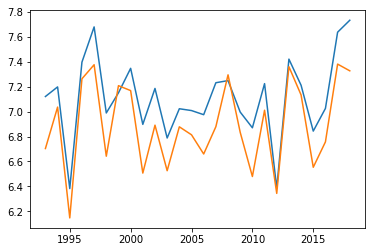

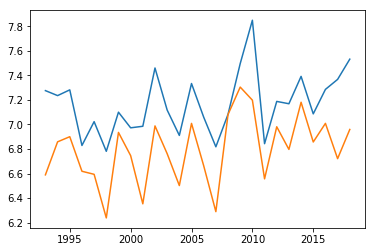

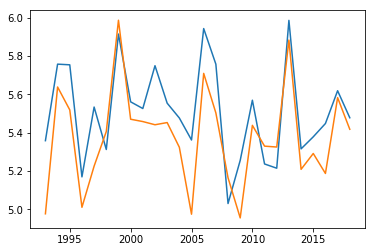

In [102]:
plt.plot(glorys_years,spring_mean_nmab)
plt.plot(glorys_years,spring_mean_smab)
plt.show()
plt.plot(glorys_years,fall_mean_nmab)
plt.plot(glorys_years,fall_mean_smab)
plt.show()
plt.plot(glorys_years,summer_mean_nmab)
plt.plot(glorys_years,summer_mean_smab)
plt.show()

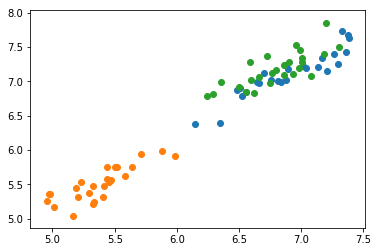

In [89]:
plt.scatter(spring_mean_smab,spring_mean_nmab)
plt.scatter(summer_mean_smab,summer_mean_nmab)
plt.scatter(fall_mean_smab,fall_mean_nmab)
plt.show()

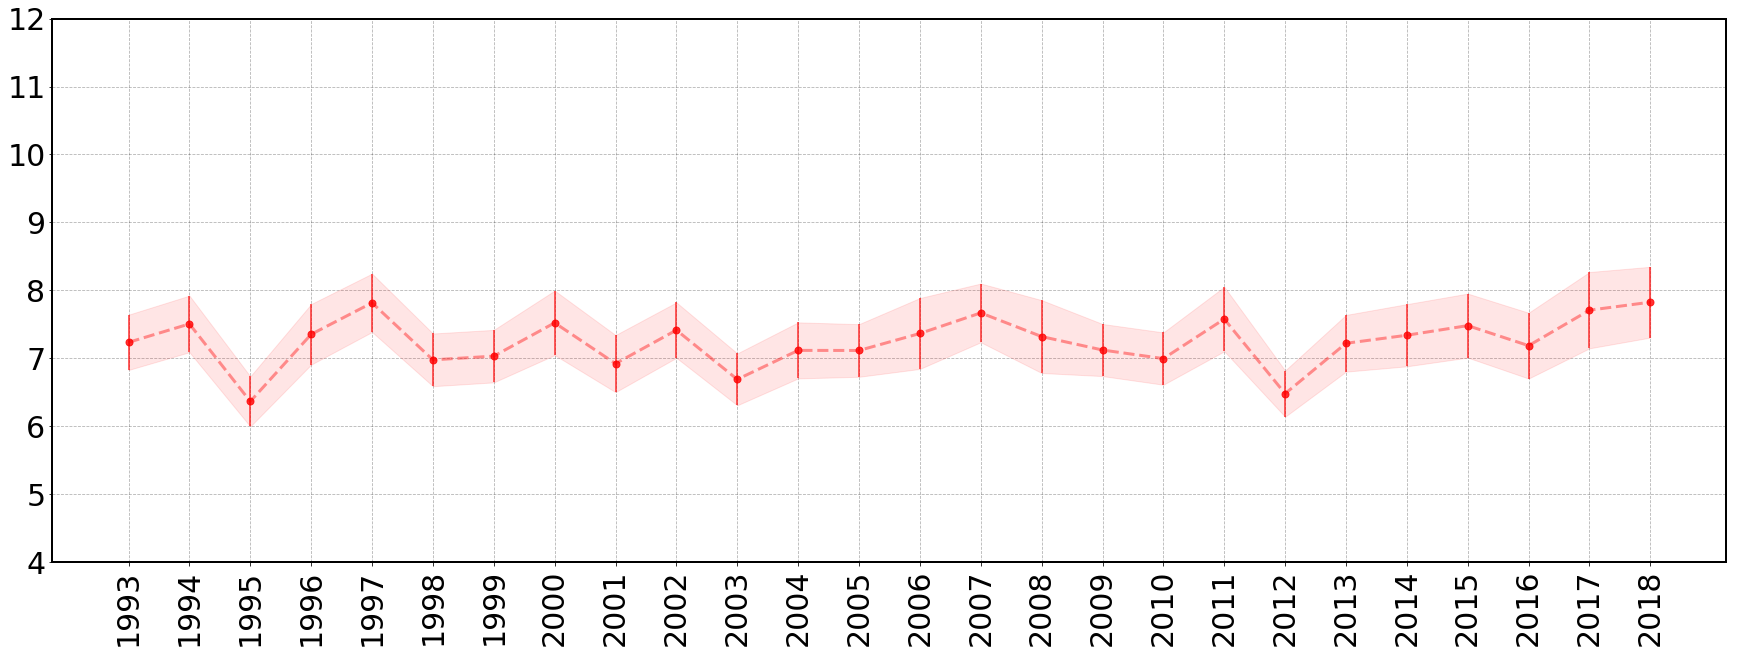

In [165]:
plt.figure(figsize=(30,10))
plt.ylim(4,12)

use_mean = spring_mean
use_std = spring_std
mean_asarray = np.asarray(use_mean)
std_asarray = np.asarray(use_std)

plt.plot(glorys_years, use_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(glorys_years,use_mean, use_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(glorys_years, mean_asarray - std_asarray, mean_asarray + std_asarray,color = 'red', alpha = 0.1,zorder = 30)
# plt.plot(np.unique(glorys_years), np.poly1d(np.polyfit(glorys_years, glorys_mean, 1))(np.unique(glorys_mean)),c='red',linewidth = 2,linestyle = '-',zorder= 100)
# a, b = best_fit(glorys_years, glorys_mean)
# yfit = [a + b * xi for xi in glorys_years]
# plt.plot(glorys_years, yfit,color='red',linestyle='-',linewidth = 5)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.xticks(glorys_years, rotation = 90, fontsize = 30) 
plt.yticks([4,5,6,7,8,9,10,11,12], fontsize = 30) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.show()

In [166]:
# Spring CORRECTED
dens_mean = [24.77777777777778, 22.076923076923077, 22.365853658536587, 21.696202531645568, 39.538823529411765, 16.1803738317757, 34.455555555555556, 26.5, 9.648148148148149, 17.76595744680851, 22.21875, 25.26875, 13.925925925925926, 13.650176678445229, 40.20754716981132, 25.955223880597014, 22.059701492537314, 12.418181818181818, 17.85185185185185, 15.621301775147929, 14.692307692307692, 17.846153846153847, 17.096385542168676, 8.566666666666666, 13.436363636363636, 10.783783783783784]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
dens_std = [21.036644315108912, 13.71588517277957, 23.252694572415663, 15.48643279709591, 36.32436573731863, 10.598900256695703, 37.34026988796235, 15.2567765523793, 4.344406107912588, 9.605733717890551, 14.48531686784603, 34.66945837966931, 10.661998332442147, 8.837052774637236, 46.13248417103724, 28.359399508442014, 18.594460397798606, 5.714474503855875, 15.952059555214484, 10.573935642037979, 13.149290709154094, 20.82833914498373, 13.01370240135404, 2.4308836669612246, 9.249151385224557, 3.2070680200590203]

temp_mean = [31.51219512195122, 29.43243243243243, 25.897435897435898, 38.60526315789474, 47.74938271604938, 23.645, 37.8433734939759, 45.696969696969695, 20.07843137254902, 22.093023255813954, 35.62068965517241, 30.748387096774195, 15.474418604651163, 15.202898550724637, 46.745098039215684, 29.92063492063492, 30.45, 13.117647058823529, 19.6734693877551, 24.18633540372671, 19.233333333333334, 18.5, 17.846153846153847, 9.172413793103448, 15.11320754716981, 15.783783783783784]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
temp_std = [21.5755903177868, 20.265653127809543, 26.323688423162324, 31.17908655808395, 40.895204863947036, 21.345538057155995, 40.56024784877335, 40.816268852386585, 17.815547296959362, 14.74192911309903, 37.82778501068067, 37.85011340860141, 12.637950802173465, 14.018771529781633, 51.36101367272842, 32.58057089110584, 30.175433379837596, 6.022116102578991, 16.404252186427712, 23.35224961565376, 22.60895777676212, 20.40069912013223, 13.77092450194836, 2.5364340198289828, 9.369878862525571, 24.657808246223095]

glorys_mean = [22.567114, 18.913176, 18.764471, 19.165308, 29.113565, 14.747943, 25.429754, 21.93917, 16.017096, 23.260954, 22.65577, 17.083418, 23.785368, 23.897976, 26.469152, 22.738518, 20.615736, 18.465754, 22.181524, 20.003044, 22.982174, 26.837084, 29.14387, 19.05772, 36.336433, 26.108059]
glorys_std = [6.036619, 3.781576, 7.208805, 3.540857, 6.963559, 2.6641815, 5.6733646, 5.212365, 2.7092028, 6.260203, 5.9608006, 6.0090017, 4.466255, 3.5413916, 6.8464513, 4.1565237, 5.963527, 2.8520381, 3.2418656, 3.5849235, 5.695122, 8.029004, 8.271338, 3.1549542, 10.354675, 8.110586]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

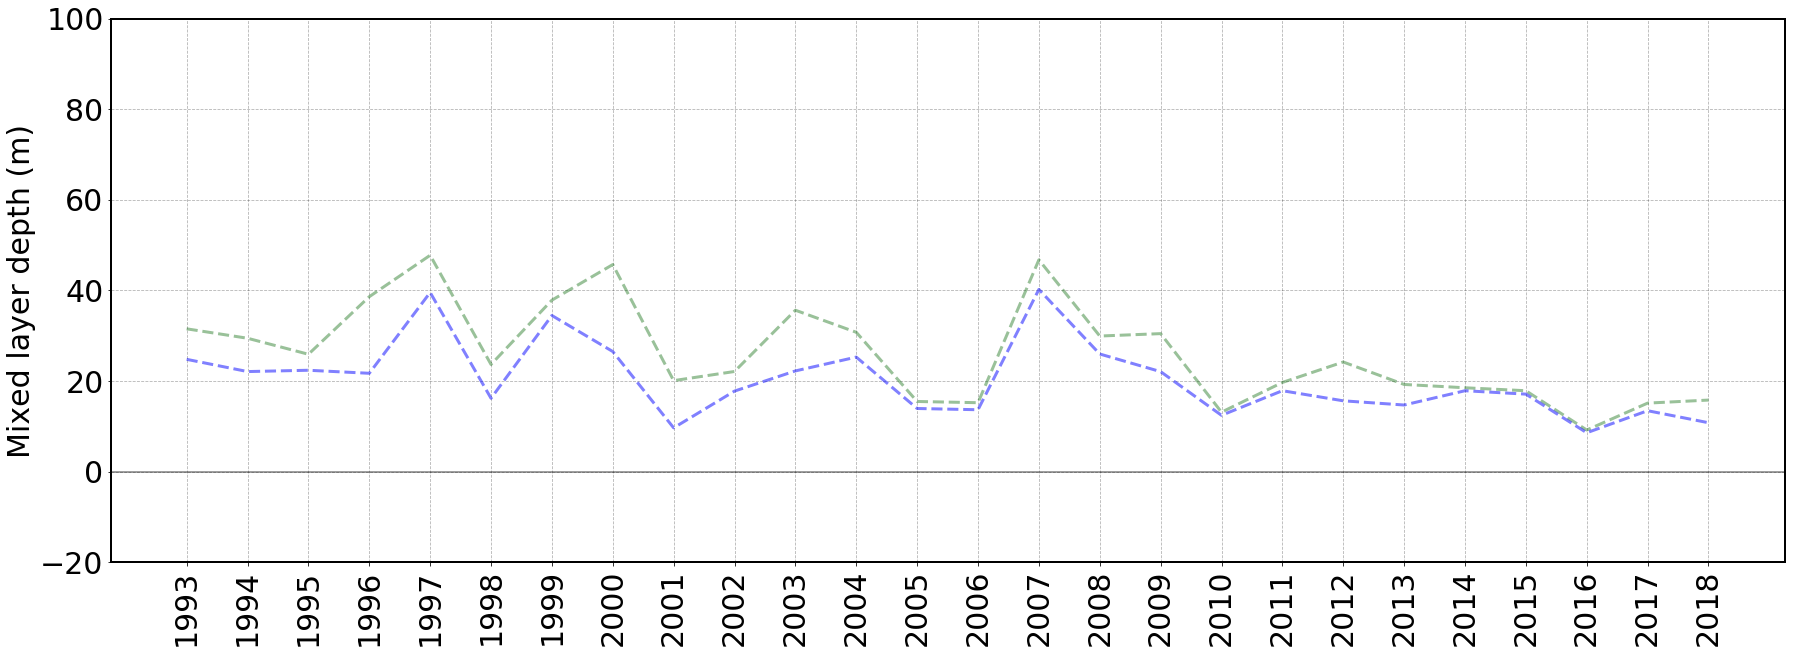

In [192]:
plt.figure(figsize=(30,10))
plt.ylim(-20,100)

mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)
mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)

# plt.plot(glorys_years, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
# plt.errorbar(glorys_years,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
# plt.fill_between(glorys_years, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(temp_years, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
# plt.errorbar(temp_years,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
# plt.fill_between(temp_years, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(dens_years, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
# plt.errorbar(dens_years,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
# plt.fill_between(dens_years, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

# plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks(glorys_years, rotation = 90, fontsize = 30) 
plt.yticks([-20,0,20,40,60,80,100], fontsize = 30) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.show()

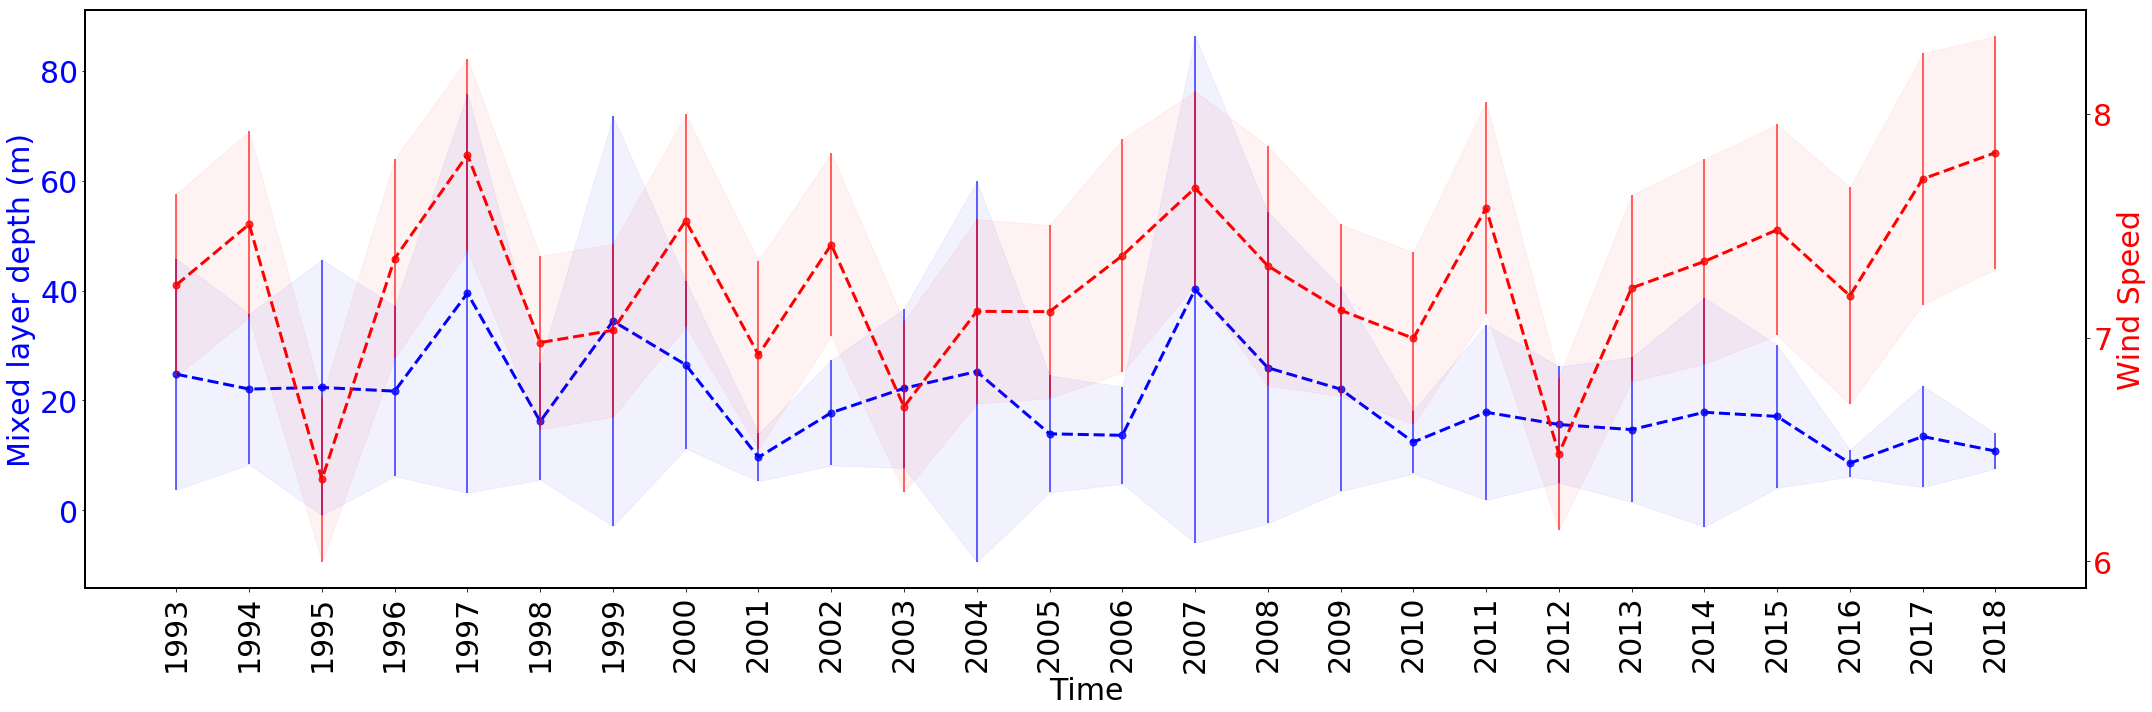

In [262]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (30,10))
# f, axs = plt.subplots(2,2,figsize=(15,15))

ax1.set_xlabel('Time',fontsize = 30)
ax1.set_ylabel('Mixed layer depth (m)',fontsize = 30,color = 'blue')
ax1.plot(dens_years, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1)
ax1.errorbar(dens_years,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
ax1.set_xticks(glorys_years) 
ax1.set_yticks([-20,0,20,40,60,80,100]) 
ax1.tick_params(axis='y', which='major', labelsize=30,labelcolor = 'blue')
ax1.tick_params(axis='x', which='major', labelsize=30,rotation = 90)
ax1.fill_between(dens_years, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.05,zorder=25)


# ax1.tick_params(fontsize = 30)
# ax1.set_xticks(glorys_years, rotation = 90, fontsize = 30) 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Wind Speed',rotation = 90,fontsize = 30,color = 'red')  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='y', which='major', labelsize=30,labelcolor='red')
ax2.errorbar(glorys_years,use_mean, use_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
ax2.set_yticks([4,5,6,7,8,9,10]) 
ax2.tick_params(axis='y', which='major', labelsize=30,labelcolor = 'red')
ax2.fill_between(glorys_years, mean_asarray - std_asarray, mean_asarray + std_asarray,color = 'red', alpha = 0.05,zorder = 30)

ax2.plot(glorys_years, use_mean, linestyle='--', color='red', linewidth=3,alpha = 1, zorder= 30)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [185]:
import scipy.stats
print('temp and dens')
print(scipy.stats.pearsonr(temp_mean, dens_mean)[0])
print('')
print('temp and glorys')
print(scipy.stats.pearsonr(temp_mean, glorys_mean)[0])
print('')
print('dens and glorys')
print(scipy.stats.pearsonr(dens_mean, glorys_mean)[0])
print('')
print('wind and glorys')
print(scipy.stats.pearsonr(use_mean, glorys_mean)[0])
print('')
print('wind and temp')
print(scipy.stats.pearsonr(use_mean, temp_mean)[0])
print('')
print('wind and dens')
print(scipy.stats.pearsonr(use_mean, dens_mean)[0])

temp and dens
0.9025479284773469

temp and glorys
0.022175675231587443

dens and glorys
0.20501743054972996

wind and glorys
0.583326981821166

wind and temp
0.12119586477917511

wind and dens
0.19911035109061118


In [189]:
print('TEMP_MEAN AND TEMP_YEARS')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_mean, temp_years)
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print('std_err:',std_err)
print('')

print('DENS_MEAN AND DENS_YEARS')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dens_mean, dens_years)
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print('std_err:',std_err)
print('')

print('GLORYS_MEAN AND GLORYS_YEARS')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(glorys_mean, glorys_years)
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print('std_err:',std_err)
print('')

print('WIND_MEAN AND GLORYS_YEARS')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(use_mean, glorys_years)
print('slope:  ',slope)
print('r_value:',r_value)
print('p_value:',p_value)
print('std_err:',std_err)
print('')

TEMP_MEAN AND TEMP_YEARS
slope:   -0.42044838146546054
r_value: -0.5971033217462288
p_value: 0.0012799788682706277
std_err: 0.11529777509694726

DENS_MEAN AND DENS_YEARS
slope:   -0.4439548469930636
r_value: -0.483250942542047
p_value: 0.01238814819200735
std_err: 0.16417523035839163

GLORYS_MEAN AND GLORYS_YEARS
slope:   0.6706858992715816
r_value: 0.4102872035186086
p_value: 0.03735702995129648
std_err: 0.30429838081495747

WIND_MEAN AND GLORYS_YEARS
slope:   4.6134613235789805
r_value: 0.2238009155062209
p_value: 0.2717436853618307
std_err: 4.101109398862888



In [116]:
DS=xr.open_dataset(fname)

In [117]:
print(DS['si10'].shape)
DS_lat = DS['latitude']; DS_lon = DS['longitude']
print(len(DS_lat));print(len(DS_lon))

(312, 45, 61)
45
61


In [118]:
latcheck = []; loncheck = []
for ii in range(len(DS_lon)):
    for i in range(len(DS_lat)):
#         print(ii, i, 'point', DS_lon[ii].data, DS_lat[i].data)
        latcheck.append(DS_lat[i].data)
        loncheck.append(DS_lon[ii].data)

In [143]:
print(wmean.shape)

(312,)


In [141]:
mean = []; std = []
for i in range(2):
    useable = wmean[i]
    useabletransp = useable.transpose()
    
    print(useable.shape)
    print('')
#     newlon = lonlist_y #newlon 
#     newlat = latlist_y #newlat 
#     newpath = list(zip(newlon,newlat))
#     newpd = pd.DataFrame(newpath, columns=['lon','lat'])
#     path_new = Path(newpath)
#     points = np.vstack((loncheck,latcheck)).T
#     path_new = Path(newpath)
        
#     grid = path_new.contains_points(points)
#     grid = grid.reshape((45,61))
    
#     newgridded = np.where(grid == False, np.nan, useabletransp)
    
#     mean.append(np.nanmean(newgridded))
#     std.append(np.nanstd(newgridded))

()

()



In [228]:
mean = []; std = []
for i in range(312):
    useable = temp2m[i] # windsp[i]
    useabletransp = useable.transpose()
    
    newlon = lonlist_t #newlon 
    newlat = latlist_t #newlat 
    newpath = list(zip(newlon,newlat))
    newpd = pd.DataFrame(newpath, columns=['lon','lat'])
    path_new = Path(newpath)
    points = np.vstack((loncheck,latcheck)).T
    path_new = Path(newpath)
        
    grid = path_new.contains_points(points)
    grid = grid.reshape((61,45))
    
    newgridded = np.where(grid == False, np.nan, useabletransp)
    
    mean.append(np.nanmean(newgridded))
    std.append(np.nanstd(newgridded))

In [229]:
print(len(mean))
new = np.array_split(mean, 26)
_1993 = new[0]; _1994 = new[1]; _1995 = new[2]; _1996 = new[3]
_1997 = new[4]; _1998 = new[5]; _1999 = new[6]; _2000 = new[7]
_2001 = new[8]; _2002 = new[9]; _2003 = new[10]; _2004 = new[11]
_2005 = new[12]; _2006 = new[13]; _2007 = new[14]; _2008 = new[15]
_2009 = new[16]; _2010 = new[17]; _2011 = new[18];_2012 = new[19]
_2013 = new[20]; _2014 = new[21]; _2015 = new[22]; _2016 = new[23]
_2017 = new[24]; _2018 = new[25]

312


In [230]:
import scipy 
jan = (_1993[0] + _1994[0] + _1995[0] + _1996[0] + _1997[0] + _1998[0] + _1999[0] + _2000[0] + _2001[0] + _2002[0] + 
       _2003[0] + _2004[0] + _2005[0] + _2006[0] + _2007[0] + _2008[0] + _2009[0] + _2010[0] + _2011[0] + _2012[0] +
       _2013[0] + _2014[0] + _2015[0] + _2016[0] + _2017[0] + _2018[0]) / 26

feb = (_1993[1] + _1994[1] + _1995[1] + _1996[1] + _1997[1] + _1998[1] + _1999[1] + _2000[1] + _2001[1] + _2002[1] + 
       _2003[1] + _2004[1] + _2005[1] + _2006[1] + _2007[1] + _2008[1] + _2009[1] + _2010[1] + _2011[1] + _2012[1] +
       _2013[1] + _2014[1] + _2015[1] + _2016[1] + _2017[1] + _2018[1]) / 26

march = (_1993[2] + _1994[2] + _1995[2] + _1996[2] + _1997[2] + _1998[2] + _1999[2] + _2000[2] + _2001[2] + _2002[2] + 
       _2003[2] + _2004[2] + _2005[2] + _2006[2] + _2007[2] + _2008[2] + _2009[2] + _2010[2] + _2011[2] + _2012[2] +
       _2013[2] + _2014[2] + _2015[2] + _2016[2] + _2017[2] + _2018[2]) / 26

april = (_1993[3] + _1994[3] + _1995[3] + _1996[3] + _1997[3] + _1998[3] + _1999[3] + _2000[3] + _2001[3] + _2002[3] + 
       _2003[3] + _2004[3] + _2005[3] + _2006[3] + _2007[3] + _2008[3] + _2009[3] + _2010[3] + _2011[3] + _2012[3] +
       _2013[3] + _2014[3] + _2015[3] + _2016[3] + _2017[3] + _2018[3]) / 26

may = (_1993[4] + _1994[4] + _1995[4] + _1996[4] + _1997[4] + _1998[4] + _1999[4] + _2000[4] + _2001[4] + _2002[4] + 
       _2003[4] + _2004[4] + _2005[4] + _2006[4] + _2007[4] + _2008[4] + _2009[4] + _2010[4] + _2011[4] + _2012[4] +
       _2013[4] + _2014[4] + _2015[4] + _2016[4] + _2017[4] + _2018[4]) / 26

june = (_1993[5] + _1994[5] + _1995[5] + _1996[5] + _1997[5] + _1998[5] + _1999[5] + _2000[5] + _2001[5] + _2002[5] + 
       _2003[5] + _2004[5] + _2005[5] + _2006[5] + _2007[5] + _2008[5] + _2009[5] + _2010[5] + _2011[5] + _2012[5] +
       _2013[5] + _2014[5] + _2015[5] + _2016[5] + _2017[5] + _2018[5]) / 26

july = (_1993[6] + _1994[6] + _1995[6] + _1996[6] + _1997[6] + _1998[6] + _1999[6] + _2000[6] + _2001[6] + _2002[6] + 
       _2003[6] + _2004[6] + _2005[6] + _2006[6] + _2007[6] + _2008[6] + _2009[6] + _2010[6] + _2011[6] + _2012[6] +
       _2013[6] + _2014[6] + _2015[6] + _2016[6] + _2017[6] + _2018[6]) / 26

aug = (_1993[7] + _1994[7] + _1995[7] + _1996[7] + _1997[7] + _1998[7] + _1999[7] + _2000[7] + _2001[7] + _2002[7] + 
       _2003[7] + _2004[7] + _2005[7] + _2006[7] + _2007[7] + _2008[7] + _2009[7] + _2010[7] + _2011[7] + _2012[7] +
       _2013[7] + _2014[7] + _2015[7] + _2016[7] + _2017[7] + _2018[7]) / 26

sept = (_1993[8] + _1994[8] + _1995[8] + _1996[8] + _1997[8] + _1998[8] + _1999[8] + _2000[8] + _2001[8] + _2002[8] + 
       _2003[8] + _2004[8] + _2005[8] + _2006[8] + _2007[8] + _2008[8] + _2009[8] + _2010[8] + _2011[8] + _2012[8] +
       _2013[8] + _2014[8] + _2015[8] + _2016[8] + _2017[8] + _2018[8]) / 26

octob = (_1993[9] + _1994[9] + _1995[9] + _1996[9] + _1997[9] + _1998[9] + _1999[9] + _2000[9] + _2001[9] + _2002[9] + 
       _2003[9] + _2004[9] + _2005[9] + _2006[9] + _2007[9] + _2008[9] + _2009[9] + _2010[9] + _2011[9] + _2012[9] +
       _2013[9] + _2014[9] + _2015[9] + _2016[9] + _2017[9] + _2018[9]) / 26

nov = (_1993[10] + _1994[10] + _1995[10] + _1996[10] + _1997[10] + _1998[10] + _1999[10] + _2000[10] + _2001[10] + _2002[10] + 
       _2003[10] + _2004[10] + _2005[10] + _2006[10] + _2007[10] + _2008[10] + _2009[10] + _2010[10] + _2011[10] + _2012[10] +
       _2013[10] + _2014[10] + _2015[10] + _2016[10] + _2017[10] + _2018[10]) / 26

dec = (_1993[11] + _1994[11] + _1995[11] + _1996[11] + _1997[11] + _1998[11] + _1999[11] + _2000[11] + _2001[11] + _2002[11] + 
       _2003[11] + _2004[11] + _2005[11] + _2006[11] + _2007[11] + _2008[11] + _2009[11] + _2010[11] + _2011[11] + _2012[11] +
       _2013[11] + _2014[11] + _2015[11] + _2016[11] + _2017[11] + _2018[11]) / 26

In [231]:
jan_s = np.std([_1993[0] , _1994[0] , _1995[0] , _1996[0] , _1997[0] , _1998[0] , _1999[0] , _2000[0] , _2001[0] , _2002[0] , 
       _2003[0] , _2004[0] , _2005[0] , _2006[0] , _2007[0] , _2008[0] , _2009[0] , _2010[0] , _2011[0] , _2012[0] ,
       _2013[0] , _2014[0] , _2015[0] , _2016[0] , _2017[0] , _2018[0]])

feb_s = np.std([_1993[1] , _1994[1] , _1995[1] , _1996[1] , _1997[1] , _1998[1] , _1999[1] , _2000[1] , _2001[1] , _2002[1] , 
       _2003[1] , _2004[1] , _2005[1] , _2006[1] , _2007[1] , _2008[1] , _2009[1] , _2010[1] , _2011[1] , _2012[1] ,
       _2013[1] , _2014[1] , _2015[1] , _2016[1] , _2017[1] , _2018[1]])

march_s = np.std([_1993[2] , _1994[2] , _1995[2] , _1996[2] , _1997[2] , _1998[2] , _1999[2] , _2000[2] , _2001[2] , _2002[2] , 
       _2003[2] , _2004[2] , _2005[2] , _2006[2] , _2007[2] , _2008[2] , _2009[2] , _2010[2] , _2011[2] , _2012[2] ,
       _2013[2] , _2014[2] , _2015[2] , _2016[2] , _2017[2] , _2018[2]])

april_s = np.std([_1993[3] , _1994[3] , _1995[3] , _1996[3] , _1997[3] , _1998[3] , _1999[3] , _2000[3] , _2001[3] , _2002[3] , 
       _2003[3] , _2004[3] , _2005[3] , _2006[3] , _2007[3] , _2008[3] , _2009[3] , _2010[3] , _2011[3] , _2012[3] ,
       _2013[3] , _2014[3] , _2015[3] , _2016[3] , _2017[3] , _2018[3]])

may_s = np.std([_1993[4] , _1994[4] , _1995[4] , _1996[4] , _1997[4] , _1998[4] , _1999[4] , _2000[4] , _2001[4] , _2002[4] , 
       _2003[4] , _2004[4] , _2005[4] , _2006[4] , _2007[4] , _2008[4] , _2009[4] , _2010[4] , _2011[4] , _2012[4] ,
       _2013[4] , _2014[4] , _2015[4] , _2016[4] , _2017[4] , _2018[4]])

june_s = np.std([_1993[5] , _1994[5] , _1995[5] , _1996[5] , _1997[5] , _1998[5] , _1999[5] , _2000[5] , _2001[5] , _2002[5] , 
       _2003[5] , _2004[5] , _2005[5] , _2006[5] , _2007[5] , _2008[5] , _2009[5] , _2010[5] , _2011[5] , _2012[5] ,
       _2013[5] , _2014[5] , _2015[5] , _2016[5] , _2017[5] , _2018[5]])

july_s = np.std([_1993[6] , _1994[6] , _1995[6] , _1996[6] , _1997[6] , _1998[6] , _1999[6] , _2000[6] , _2001[6] , _2002[6] , 
       _2003[6] , _2004[6] , _2005[6] , _2006[6] , _2007[6] , _2008[6] , _2009[6] , _2010[6] , _2011[6] , _2012[6] ,
       _2013[6] , _2014[6] , _2015[6] , _2016[6] , _2017[6] , _2018[6]])

aug_s = np.std([_1993[7] , _1994[7] , _1995[7] , _1996[7] , _1997[7] , _1998[7] , _1999[7] , _2000[7] , _2001[7] , _2002[7] , 
       _2003[7] , _2004[7] , _2005[7] , _2006[7] , _2007[7] , _2008[7] , _2009[7] , _2010[7] , _2011[7] , _2012[7] ,
       _2013[7] , _2014[7] , _2015[7] , _2016[7] , _2017[7] , _2018[7]])

sept_s = np.std([_1993[8] , _1994[8] , _1995[8] , _1996[8] , _1997[8] , _1998[8] , _1999[8] , _2000[8] , _2001[8] , _2002[8] , 
       _2003[8] , _2004[8] , _2005[8] , _2006[8] , _2007[8] , _2008[8] , _2009[8] , _2010[8] , _2011[8] , _2012[8] ,
       _2013[8] , _2014[8] , _2015[8] , _2016[8] , _2017[8] , _2018[8]])

octob_s = np.std([_1993[9] , _1994[9] , _1995[9] , _1996[9] , _1997[9] , _1998[9] , _1999[9] , _2000[9] , _2001[9] , _2002[9] , 
       _2003[9] , _2004[9] , _2005[9] , _2006[9] , _2007[9] , _2008[9] , _2009[9] , _2010[9] , _2011[9] , _2012[9] ,
       _2013[9] , _2014[9] , _2015[9] , _2016[9] , _2017[9] , _2018[9]])

nov_s = np.std([_1993[10] , _1994[10] , _1995[10] , _1996[10] , _1997[10] , _1998[10] , _1999[10] , _2000[10] , _2001[10] , _2002[10] , 
       _2003[10] , _2004[10] , _2005[10] , _2006[10] , _2007[10] , _2008[10] , _2009[10] , _2010[10] , _2011[10] , _2012[10] ,
       _2013[10] , _2014[10] , _2015[10] , _2016[10] , _2017[10] , _2018[10]])

dec_s = np.std([_1993[11] , _1994[11] , _1995[11] , _1996[11] , _1997[11] , _1998[11] , _1999[11] , _2000[11] , _2001[11] , _2002[11] , 
       _2003[11] , _2004[11] , _2005[11] , _2006[11] , _2007[11] , _2008[11] , _2009[0] , _2010[0] , _2011[0] , _2012[0] ,
       _2013[11] , _2014[11] , _2015[11] , _2016[11] , _2017[11] , _2018[11]])

In [232]:
mean = [jan, feb, march, april, may, june, july, aug, sept, octob, nov, dec]
std = [jan_s, feb_s, march_s, april_s, may_s, june_s, july_s, aug_s, sept_s, octob_s, nov_s, dec_s]
print(mean)
print('')
print(std)

[274.12220177283655, 274.00037560096155, 275.71536959134613, 279.01624474158655, 282.7657001201923, 287.2919921875, 291.4202411358173, 292.15737680288464, 289.8768780048077, 285.57669771634613, 281.20351938100964, 277.1749737079327]

[1.7503309, 1.5864068, 1.1218085, 0.8526514, 0.83527005, 0.8552969, 1.000147, 0.85919356, 0.8189758, 0.9947392, 1.0014161, 1.8270117]
